### 2. house dataset  - 상관분석 및 회귀분석 실시 (house price 에 미치는 영향 분석 ) - 다중회귀분석, 다중공선성, 변수 선택법 ,모형적합도 등   

### Config

In [261]:
import os
import random as rd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

<br>

### Data load

features: 
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [262]:
df = pd.read_csv("../data/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [263]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [264]:
# data 기초 통계량 확인
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<br>

### 결측치 처리

In [265]:
# 결측치 확인
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# 총 데이터 20640개 중, total_bedrooms에 결측치 207개 존재, 약 1%에 해당
# 특정 값으로 대체하면, 데이터의 왜곡이 발생할 수 있는 것을 고려해 결측치 제거
df.dropna(inplace=True)

In [267]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<br>

### 범주형 변수 인코딩 (dummy변수 추가)

In [268]:
# feature: 'oceon_proximity' value_counts check
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [269]:
# 'ocean_proximity' one-hot encoding
# 기본 encoding을 진행하려, 했으나 숫자의 크기에 따라 영향을 받을 수 있기 때문에 one-hot encoding을 진행

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [270]:
# 변수 이름 rename  
df_encoded.rename(columns={'ocean_proximity_INLAND': 'inland',
                           'ocean_proximity_ISLAND': 'island',
                           'ocean_proximity_NEAR BAY': 'near_bay',
                           'ocean_proximity_NEAR OCEAN': 'near_ocean'}, inplace=True)
print(df_encoded.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'inland', 'island', 'near_bay', 'near_ocean'],
      dtype='object')


In [271]:
# target column 위치 변경
def set_target_first(df, target):
    cols = df_encoded.columns.tolist()
    cols.remove(target)
    cols.insert(0, target)
    return df[cols]

df = set_target_first(df_encoded, 'median_house_value')
df

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,inland,island,near_bay,near_ocean
0,452600.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,358500.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,352100.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,341300.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,342200.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,True,False,False,False
20636,77100.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,True,False,False,False
20637,92300.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,True,False,False,False
20638,84700.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,True,False,False,False


<br>

### 상관관계 분석

In [272]:
# correlation Y with each X

for col in df.columns:
    corr, p_value = pearsonr(df[col], df['median_house_value'])
    print(f'median_house_value(target) & {col + "(feature)":<40} corr: {corr:>8.3f},  P-value: {p_value:.4f}')

# P-value가 모두 0.001 이하로, 모든 feature가 target과 관련이 있다고 볼 수 있음

median_house_value(target) & median_house_value(feature)              corr:    1.000,  P-value: 0.0000
median_house_value(target) & longitude(feature)                       corr:   -0.045,  P-value: 0.0000
median_house_value(target) & latitude(feature)                        corr:   -0.145,  P-value: 0.0000
median_house_value(target) & housing_median_age(feature)              corr:    0.106,  P-value: 0.0000
median_house_value(target) & total_rooms(feature)                     corr:    0.133,  P-value: 0.0000
median_house_value(target) & total_bedrooms(feature)                  corr:    0.050,  P-value: 0.0000
median_house_value(target) & population(feature)                      corr:   -0.025,  P-value: 0.0003
median_house_value(target) & households(feature)                      corr:    0.065,  P-value: 0.0000
median_house_value(target) & median_income(feature)                   corr:    0.688,  P-value: 0.0000
median_house_value(target) & inland(feature)                          cor

In [273]:
df.iloc[:, :-1].corr()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,inland,island,near_bay
median_house_value,1.000000,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,-0.484787,0.023525,0.160526
longitude,-0.045398,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.055337,0.009501,-0.474714
latitude,-0.144638,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,0.351084,-0.016662,0.358785
housing_median_age,0.106432,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,-0.236968,0.017105,0.256149
total_rooms,0.133294,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.026477,-0.007603,-0.023647
total_bedrooms,0.049686,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,-0.006463,-0.004361,-0.019873
population,-0.025300,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.019602,-0.010451,-0.061480
households,0.064894,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,-0.038265,-0.009119,-0.011280
median_income,0.688355,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,-0.237536,-0.009281,0.056677
inland,-0.484787,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,1.000000,-0.010681,-0.241356


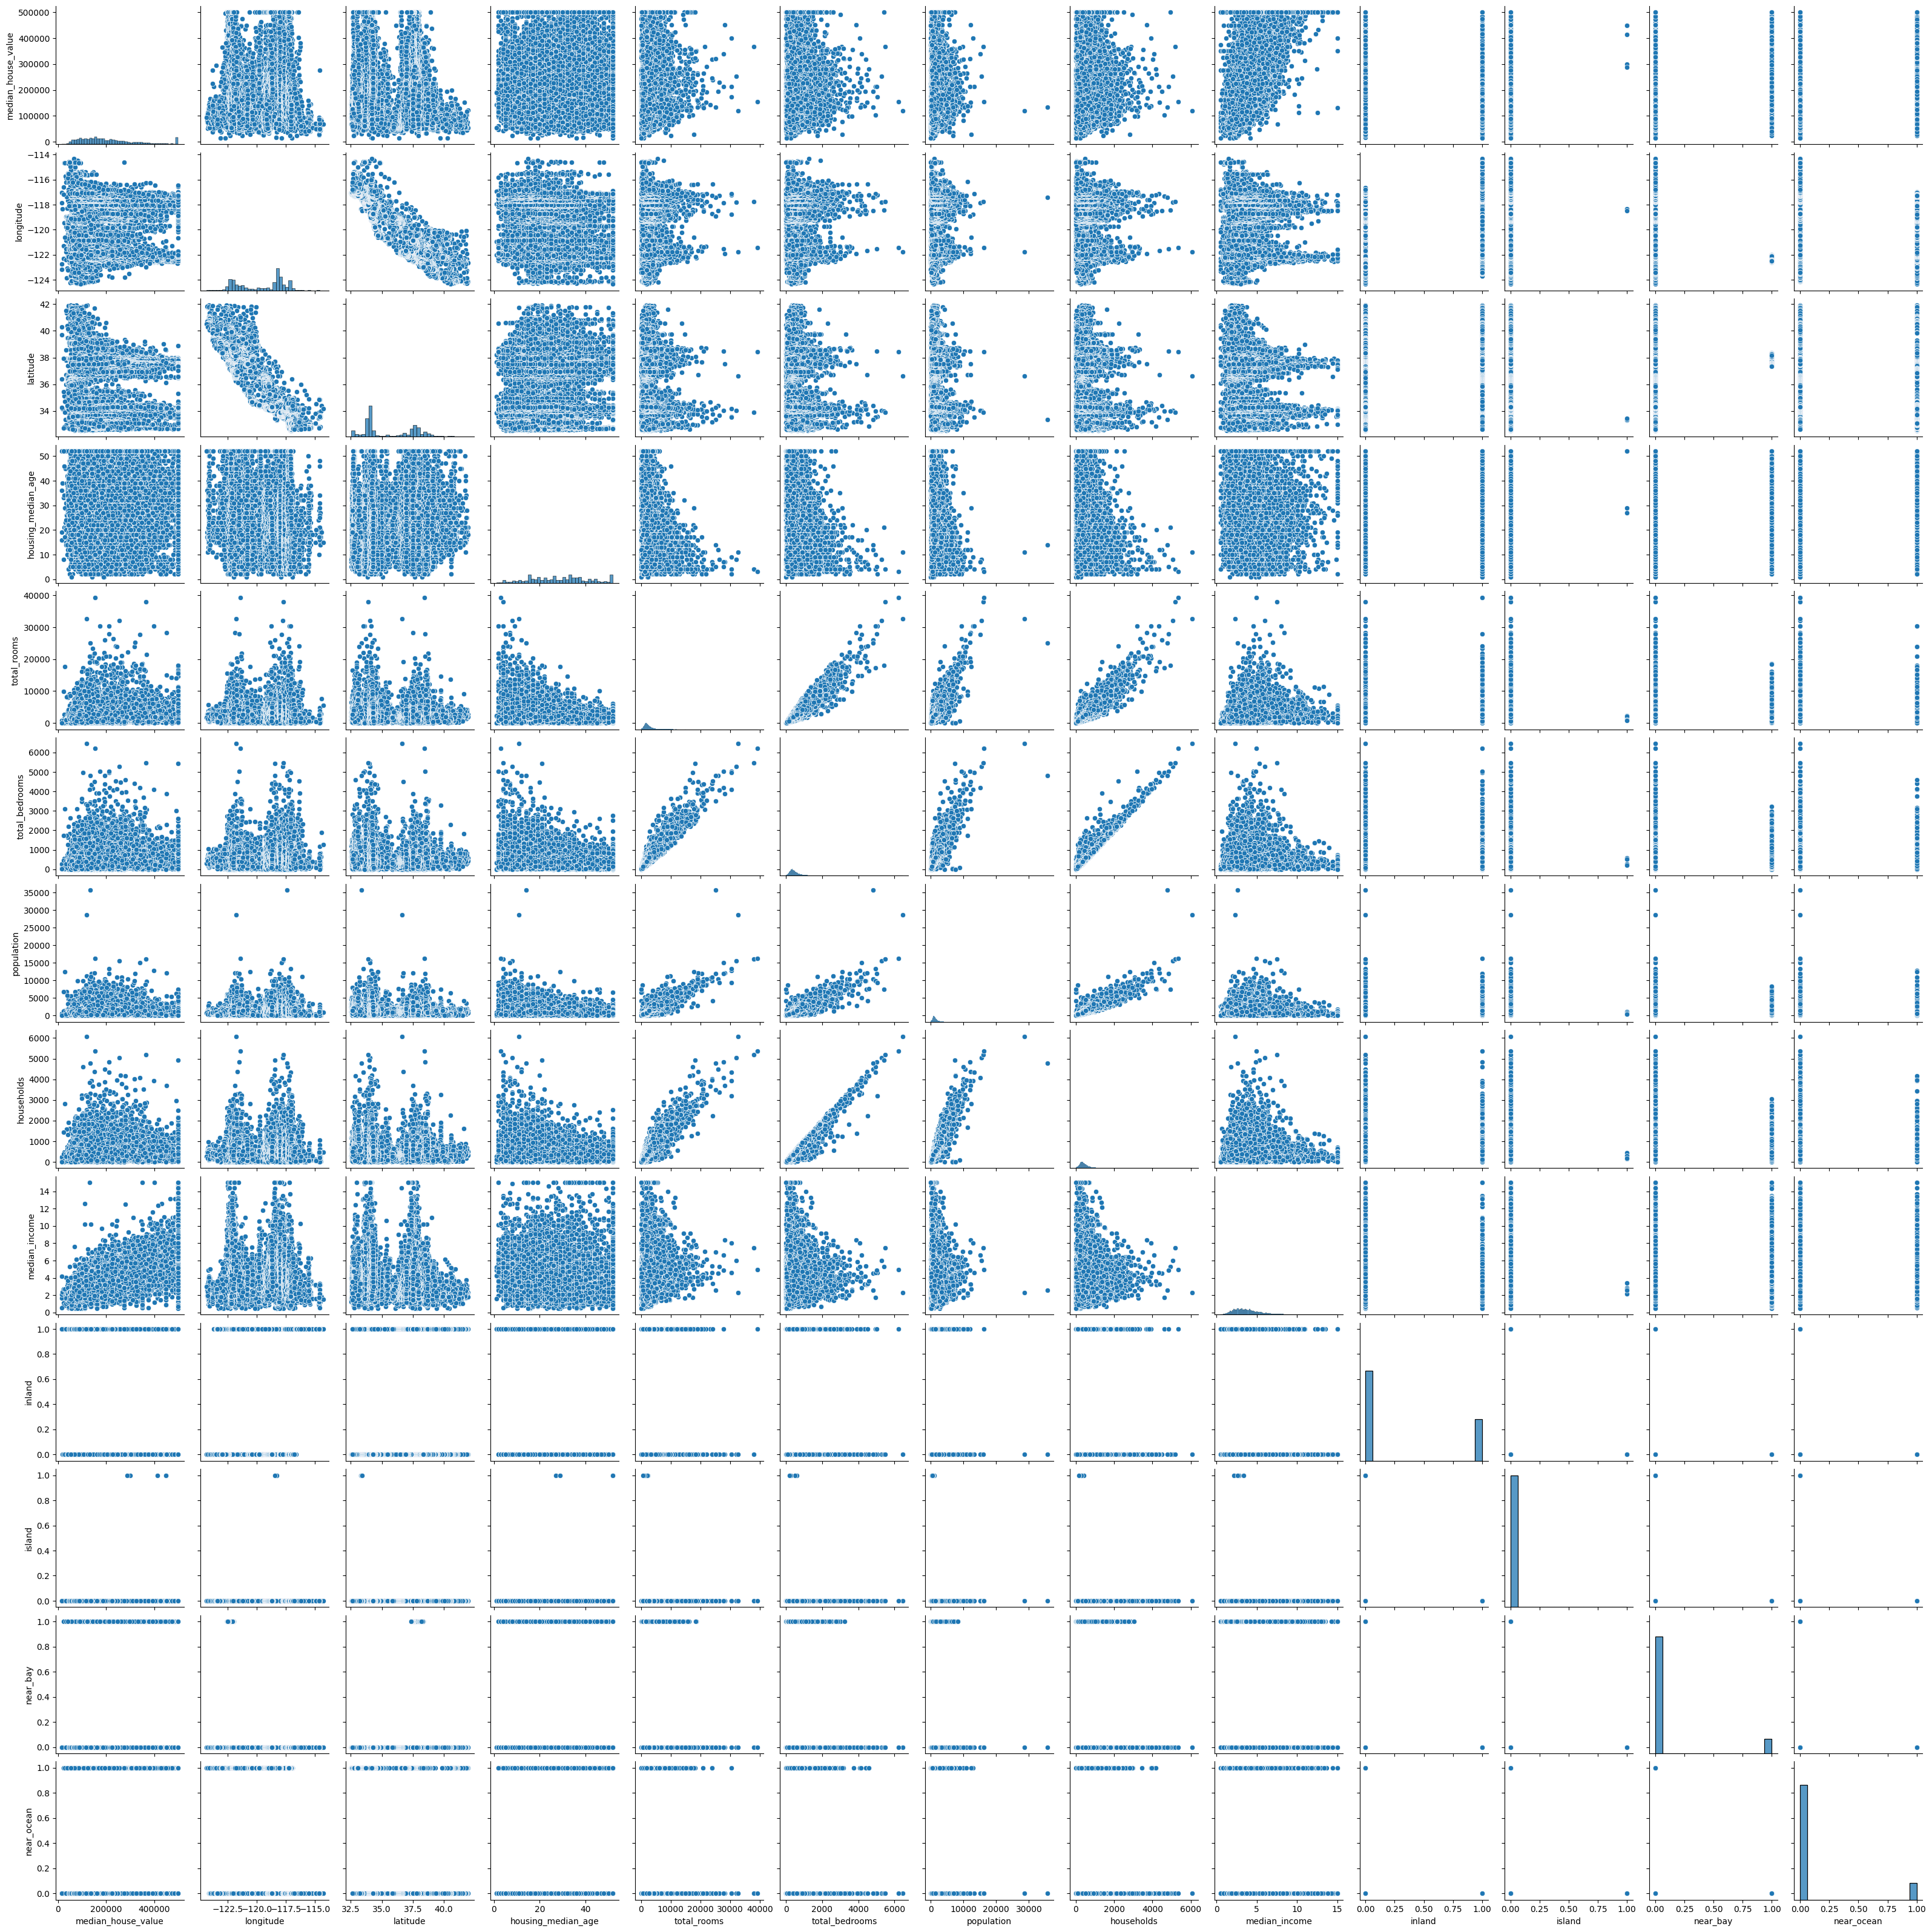

In [274]:
sns.pairplot(df)

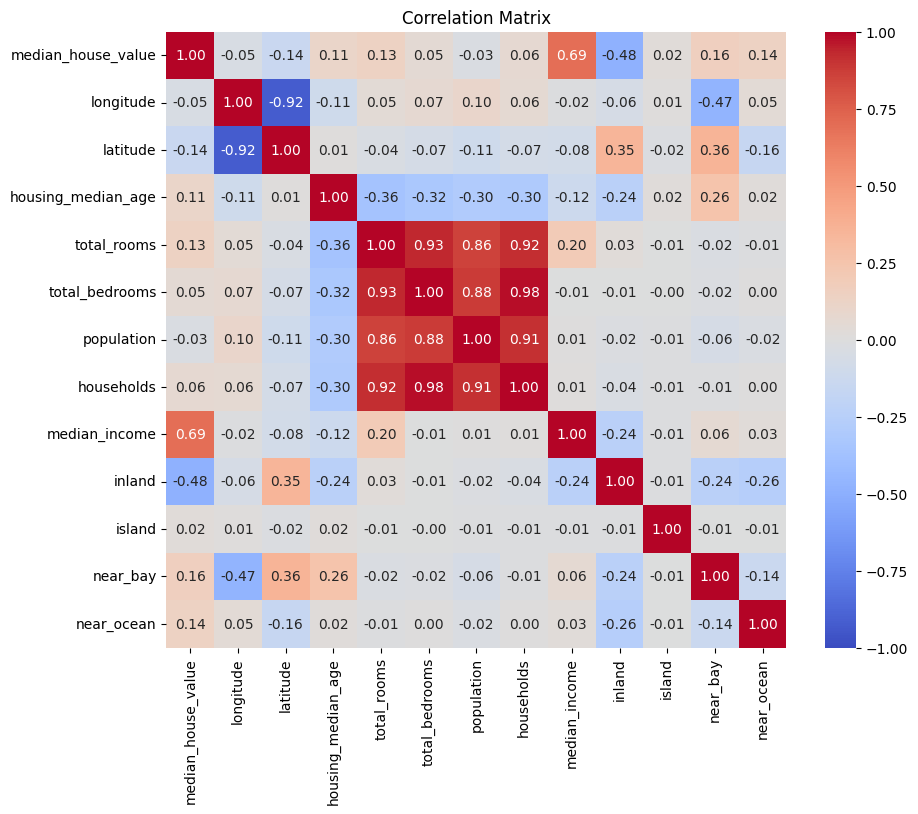

In [275]:
# visualization
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,    
            annot=True, # show numbers in each cell
            cmap='coolwarm',    # color of heatmap
            vmin=-1, vmax=1,   # limit of color bar
            fmt='.2f')  # number format in each cell
plt.title('Correlation Matrix')
plt.show()

- median_house_value와의 상관관계 분석
    - modeian_incom: 상관계수 0.69로, 가장 강한 양의 상관관계를 보임. 즉, 소득 수준이 높을수록 집값이 높아지는 경향이 강함.
    - ocean_proximity_INLAND: 상관계수 -0.48로, 강한 음의 상관관계를 보임. 내륙에 위치한 집은 집값이 낮은 경향이 있음.
    - ocean_proximity_NEAR BAY: 상관계수 0.16으로 약한 양의 상관관계. 만 근처에 있는 집은 집값이 조금 높은 경향이 있음.
    - housing_median_age: 상관계수 0.11, 나이가 많은 건물이 집값에 약간의 양의 영향을 미침.
    - total_rooms, total_bedrooms, households, population: 상관계수가 약 0.05~0.13로 매우 약한 양의 상관관계. 이 변수들은 집값과 큰 관계가 없어 보임.

- 다중공선성
    - total_rooms, total_bedrooms, population, households 간의 강한 상관관계가 보임
    - 이는 다중공선성의 가능성을 나타냄

<br>

### 다중공선성 확인

In [276]:
print(df.loc[0])

median_house_value    452600.0
longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
inland                   False
island                   False
near_bay                  True
near_ocean               False
Name: 0, dtype: object


In [277]:
model = smf.ols(formula='median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income + inland + island + near_bay + near_ocean',
                data=df)

# VIF df 생성
vif_result = pd.DataFrame({'X': column,
                        'VIF': variance_inflation_factor(model.exog, i)}
                        for i, column in enumerate(model.exog_names))
vif_result

,X,VIF
0,Intercept,33578.822227
1,inland[T.True],2.859799
2,island[T.True],1.002203
3,near_bay[T.True],1.567099
4,near_ocean[T.True],1.196748
5,longitude,18.090772
6,latitude,19.969176
7,housing_median_age,1.323622
8,total_rooms,12.966422
9,total_bedrooms,36.309883


- 일반적으로 VIF(분산확대인자)의 값 > 10이면, 다중공선성이 존재한다고 봄.
- longitude, latitude, total_rooms, total_bedrooms, households 변수들은 다중공선성이 존재한다고 볼 수 있음.

In [278]:
# 다중공선성이 높은 변수 제거
df.drop(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'households'], axis=1, inplace=True)
print(df.columns)

Index(['median_house_value', 'housing_median_age', 'population',
       'median_income', 'inland', 'island', 'near_bay', 'near_ocean'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_160552\53877655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'households'], axis=1, inplace=True)


<br>

### 정규화

In [279]:
# standardization
# 데이터의 단위 차이로 인한 왜곡을 방지하기 위해 standardization 진행
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,median_house_value,housing_median_age,population,median_income,inland,island,near_bay,near_ocean
0,2.128819,0.982163,-0.973320,2.345163,-0.682713,-0.015645,2.828661,-0.384186
1,1.313626,-0.606210,0.861339,2.332632,-0.682713,-0.015645,2.828661,-0.384186
2,1.258183,1.855769,-0.819769,1.782939,-0.682713,-0.015645,2.828661,-0.384186
3,1.164622,1.855769,-0.765056,0.932970,-0.682713,-0.015645,2.828661,-0.384186
4,1.172418,1.855769,-0.758879,-0.013143,-0.682713,-0.015645,2.828661,-0.384186
...,...,...,...,...,...,...,...,...
20428,-1.115492,-0.288535,-0.511787,-1.216727,1.464744,-0.015645,-0.353524,-0.384186
20429,-1.124155,-0.844466,-0.943315,-0.692044,1.464744,-0.015645,-0.353524,-0.384186
20430,-0.992477,-0.923885,-0.368826,-1.143171,1.464744,-0.015645,-0.353524,-0.384186
20431,-1.058316,-0.844466,-0.603564,-1.055136,1.464744,-0.015645,-0.353524,-0.384186


<br>

### 선형회귀

In [280]:
model_fit = smf.ols(formula='median_house_value ~ housing_median_age + population + median_income + inland + island + near_bay + near_ocean',
                    data=df_scaled).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     4324.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:49:33   Log-Likelihood:                -19706.
No. Observations:               20433   AIC:                         3.943e+04
Df Residuals:                   20425   BIC:                         3.949e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8.111e-17      0

- R^2값은 0.597, 이 모델이 median_house_value의 변동성을 약 59.7% 설명할 수 있음.
- Adj. R^2값  또한 0.597, R^2값과 동일하므로 추가된 변수들이 모델 성능에 큰 부정적인 영향을 주지 않은 것으로 보임.
- F통계량은 4324으로 매우 크고, P-value 0.000으로 0.05보다 작아, 모델의 통계적으로 유의미함.
- 즉, 적어도 하나 이상의 독립변수가 반응변수에 영향을 미친다고 해석됨.

<br>

- population을 제외한 모든 설명변수의 P-value는 0.05보다 작아, 유의미함.
- population는 유의하지 않으므로, X(설명변수)에서 제외할 필요가 있어보임.(후진선택법)

<br>

In [281]:
model_fit = smf.ols(formula='median_house_value ~ housing_median_age + median_income + inland + island + near_bay + near_ocean',
                    data=df_scaled).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     5045.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:49:33   Log-Likelihood:                -19706.
No. Observations:               20433   AIC:                         3.943e+04
Df Residuals:                   20426   BIC:                         3.948e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8.111e-17      0

- R^2, Adj. R^2값은 동일한 것으로 보아, 모델의 성능은 동일하다고 보임.
- Condition Number 값이 1.82 -> 1.71로 감소. 다중공선성이 감소함을 보임.

- 집값의 중위값(median_house_value)에 영향을 미치는 변수
    1. median_income (62.85%, +)
    2. inland (28.93%, -)
    3. housing_median_age (10.15%, +)
    4. near_oceon (5.02%, +)
    5. near_bay (5.02%, +)
    6. island (2.5%, +)

#### 따라서, 집값은 해당 지역의 수입수준의 영향이 가장 크고 , 바다와의 거리(멀다면 상대적으로 크게 감소), 건물의 연식에 영향을 받는 것으로 보인다.

<br>